# Objective: 

* Explore  and visualize the dataset 
* Perform univariate and multivariate analysis.
* Build a linear regression model to predict the prices of used cars
* Extract actionable insights that will help the business.
* Generate set of recommendations that will help the business.

# Goals
* Define the problem and perform an Exploratory Data Analysis -Univariate analysis - Bivariate analysis
* Illustrate the insights based on EDA-Key meaningful observations on the relationship between variables
* Data pre-processing-Prepare the data for analysis and modeling - Missing value Treatment - Outlier Treatment - Feature Engineering
* Model building - Linear Regression -- Build the model and comment on the model statistics - Display model coefficients with column names
* Model performance evaluation -Evaluate the model on different performance metrics
* Actionable Insights & Recommendations-Conclude with the key takeaways for the business
* Notebook - Overall Quality -Structure and flow - Well-commented code


# Data:
**used_cars_data.csv** - It contains information about used cars sold in different locations.

* S.No.           - Serial number
* Name            - Name of the car which includes brand name and model name
* Location        - Location in which the car is being sold or is available for purchase (cities)
* Year            - Manufacturing year of the car
* Kilometers_driven- The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type       - The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission    - The type of transmission used by the car (Automatic/Manual)
* Owner           - Type of ownership
* Mileage         - The standard mileage offered by the car company in kmpl or km/kg
* Engine          - The displacement volume of the engine in CC
* Power           - The maximum power of the engine in bhp
* Seats           - The number of seats in the car
* New_Price       - The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price           - The price of the used car in INR Lakhs

### Import the necessary packages

In [494]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Limit for the number of displayed columns and rows

In [495]:
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

### Read the dataset

In [496]:
data=pd.read_csv("used_cars_data.csv")

In [497]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 7253 rows and 14 columns.


In [498]:
# copying data to another varaible to avoid any changes to original data
cars4u=data.copy()

### View the first and last 5 rows of the dataset.

In [499]:
cars4u.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [500]:
cars4u.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,86.97,NaN


In [501]:
cars4u[["Name"]].head(10)

,Name
0,Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V
3,Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic
5,Hyundai EON LPG Era Plus Option
6,Nissan Micra Diesel XV
7,Toyota Innova Crysta 2.8 GX AT 8S
8,Volkswagen Vento Diesel Comfortline
9,Tata Indica Vista Quadrajet LS


* We will split the Name column by ' ' and take all the values in one dataframe for further analysis.

In [502]:
cars4u.Name.str.split(" ", expand=True)

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Wagon,R,LXI,CNG,None,None,None,None,None
1,Hyundai,Creta,1.6,CRDi,SX,Option,None,None,None,None
2,Honda,Jazz,V,None,None,None,None,None,None,None
3,Maruti,Ertiga,VDI,None,None,None,None,None,None,None
4,Audi,A4,New,2.0,TDI,Multitronic,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Vento,Diesel,Trendline,None,None,None,None,None,None
7249,Volkswagen,Polo,GT,TSI,None,None,None,None,None,None
7250,Nissan,Micra,Diesel,XV,None,None,None,None,None,None
7251,Volkswagen,Polo,GT,TSI,None,None,None,None,None,None


In [503]:
car_df = pd.DataFrame(
    cars4u.Name.str.split(", ", expand=True).values.flatten(), columns=["Name"]
)
val_car = car_df.Name.value_counts()
val_car

Mahindra XUV500 W8 2WD             55
Maruti Swift VDI                   49
Maruti Swift Dzire VDI             42
Honda City 1.5 S MT                39
Maruti Swift VDI BSIV              37
                                   ..
Renault Pulse Petrol RxZ            1
Jeep Compass 1.4 Limited Option     1
Maruti Swift AMT ZXI                1
Skoda Laura L and K AT              1
Ford Endeavour 3.0L AT 4x2          1
Name: Name, Length: 2041, dtype: int64

* There are too many cars in the data, and adding them all as separate columns will make our data dimension very large.
* We will use a threshold, and keep only those cars with at least as many entries as the threshold.

In [504]:
# we take 10 as threshold
threshold = 20
val_car[val_car.values >= threshold]

Mahindra XUV500 W8 2WD                    55
Maruti Swift VDI                          49
Maruti Swift Dzire VDI                    42
Honda City 1.5 S MT                       39
Maruti Swift VDI BSIV                     37
Maruti Ritz VDi                           35
Toyota Fortuner 3.0 Diesel                35
Honda Amaze S i-Dtech                     32
Hyundai Grand i10 Sportz                  32
Honda Brio S MT                           32
Honda City 1.5 V MT                       32
Hyundai i10 Sportz                        31
Maruti Alto LXi                           30
Maruti Wagon R LXI                        29
Maruti Ertiga VDI                         28
Volkswagen Polo 1.2 MPI Highline          26
Maruti Wagon R VXI                        25
Hyundai EON Era Plus                      25
Hyundai Verna 1.6 SX                      25
Maruti Alto 800 LXI                       23
BMW 3 Series 320d                         23
Hyundai i10 Sportz 1.2                    23
Toyota For

In [505]:
# list of cars
cars_list = val_car[val_car.values >= threshold].index.tolist()
print("Studio names taken into consideration:", len(cars_list), cars_list)

Studio names taken into consideration: 39 ['Mahindra XUV500 W8 2WD', 'Maruti Swift VDI', 'Maruti Swift Dzire VDI', 'Honda City 1.5 S MT', 'Maruti Swift VDI BSIV', 'Maruti Ritz VDi', 'Toyota Fortuner 3.0 Diesel', 'Honda Amaze S i-Dtech', 'Hyundai Grand i10 Sportz', 'Honda Brio S MT', 'Honda City 1.5 V MT', 'Hyundai i10 Sportz', 'Maruti Alto LXi', 'Maruti Wagon R LXI', 'Maruti Ertiga VDI', 'Volkswagen Polo 1.2 MPI Highline', 'Maruti Wagon R VXI', 'Hyundai EON Era Plus', 'Hyundai Verna 1.6 SX', 'Maruti Alto 800 LXI', 'BMW 3 Series 320d', 'Hyundai i10 Sportz 1.2', 'Toyota Fortuner 4x2 AT', 'Skoda Superb Elegance 1.8 TSI AT', 'Maruti Celerio VXI AT', 'Hyundai Creta 1.6 CRDi SX', 'Audi A4 2.0 TDI', 'Volkswagen Vento Diesel Highline', 'Hyundai i10 Magna', 'Hyundai i10 Magna 1.2', 'Honda Amaze S i-Vtech', 'Maruti Swift Dzire VXI', 'Audi A6 2011-2015 2.0 TDI Premium Plus', 'Renault Duster 110PS Diesel RxZ', 'Maruti Alto K10 VXI', 'Mahindra XUV500 W6 2WD', 'Maruti Ertiga ZDI', 'Maruti Swift Dzir

In [506]:
# let us create a copy of our dataframe
cars4us = cars4u.copy()

In [507]:
# first we will fill missing values in the columns by 'Others'
cars4us.Name.fillna("'Others'", inplace=True)
cars4us.Name.isnull().sum()

0

In [508]:
cars4us.Name.str.split(" ").apply(lambda x: len(x)).value_counts()

4     2305
5     2035
6     1255
3      918
7      552
8      140
9       42
10       5
2        1
Name: Name, dtype: int64

In [509]:
#cars_val = []

#for i in range(cars4us.shape[0]):  # iterate over all rows in data
  # txt = cars4us.Name.values[i]  # getting the values in studios column
   # flag = 0  # flag variable
   # for item in cars_list:  # iterate over the list of studios considered
       # if item in txt and flag == 0:  # checking if studio name is in the row
           # cars_val.append(item)
            #flag = 1
   #if flag == 0:  # if the row values is different from the list of studios considered
       # cars_val.append("'Others'")

# we will strip the leading and trailing ', and assign the values to a column
#cars4us["car_primary"] = [item.strip("'") for item in cars_val]
#cars4us["car_primary"].tail()

In [510]:
cars4us["car_brand"] = cars4us.Name.str.split(" ", expand=True).iloc[:, 0]

In [511]:
cars4us["car_model"] = cars4us.Name.str.split(" ", expand=True).iloc[:, 1]

In [512]:
cars4us["car_v0"] = cars4us.Name.str.split(" ", expand=True).iloc[:, 2]

In [513]:
cars4us["car_v1"] = cars4us.Name.str.split(" ", expand=True).iloc[:, 3]

In [514]:
#cars4us.drop(["car_name"], axis=1, inplace=True)

In [515]:
cars4us["car_v2"] = cars4us.Name.str.split(" ", expand=True).iloc[:, 4]

In [516]:
cars4us.head(30)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_brand,car_model,car_v0,car_v1,car_v2
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti,Wagon,R,LXI,CNG
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai,Creta,1.6,CRDi,SX
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda,Jazz,V,None,None
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti,Ertiga,VDI,None,None
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi,A4,New,2.0,TDI
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35,Hyundai,EON,LPG,Era,Plus
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,3.50,Nissan,Micra,Diesel,XV,None
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50,Toyota,Innova,Crysta,2.8,GX
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.20,Volkswagen,Vento,Diesel,Comfortline,None
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95,Tata,Indica,Vista,Quadrajet,LS


In [517]:
cars4us.drop(["Name"], axis=1, inplace=True)

In [518]:
cars4us.isnull().sum()

S.No.                   0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
car_brand               0
car_model               0
car_v0                  1
car_v1                919
car_v2               3224
dtype: int64

In [519]:
# checking the summary of the data with missing values in Engine
cars4us[cars4us.Seats.isnull()].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,53.0,NaN,NaN,NaN,3723.45283,2023.683851,194.0,2325.0,3522.0,5185.0,6957.0
Location,53,11,Pune,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,53.0,NaN,NaN,NaN,2009.867925,3.946945,2001.0,2008.0,2010.0,2012.0,2019.0
Kilometers_Driven,53.0,NaN,NaN,NaN,68278.735849,34466.816317,11574.0,50295.0,63000.0,81000.0,200000.0
Fuel_Type,53,2,Petrol,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,53,2,Manual,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,53,4,First,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,53,17,0.0 kmpl,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7,5,1061 CC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,3,3,100 bhp,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We will now drop the nan from columns  after verified.

In [521]:
#cars4us.dropna(["car_v1", "car_v2"], axis=1, inplace=True)
cars4us.dropna(subset=["car_v1"], inplace=True)
cars4us.dropna(subset=["car_v2"], inplace=True)
cars4us.dropna(subset=["Engine"], inplace=True)
cars4us.dropna(subset=["Price"], inplace=True)
cars4us.dropna(subset=["Power"], inplace=True)
cars4us.dropna(subset=["Seats"], inplace=True)
# let us reset the dataframe index
cars4us.reset_index(inplace=True, drop=True)

# let's check the summary of our data


In [522]:
cars4us.isnull().sum()

S.No.                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
car_brand            0
car_model            0
car_v0               0
car_v1               0
car_v2               0
dtype: int64

In [523]:
cars4us.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,3287.0,NaN,NaN,NaN,3024.186188,1748.497444,0.0,1491.0,3037.0,4533.5,6015.0
Location,3287,11,Mumbai,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3287.0,NaN,NaN,NaN,2013.904472,2.981277,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,3287.0,NaN,NaN,NaN,58136.008214,118681.121148,171.0,32000.0,51681.0,71865.0,6500000.0
Fuel_Type,3287,4,Diesel,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,3287,2,Manual,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,3287,4,First,2775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,3287,356,17.0 kmpl,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,3287,107,1498 CC,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,3287,276,118 bhp,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [524]:
cars4us.head(10)

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_brand,car_model,car_v0,car_v1,car_v2
0,0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti,Wagon,R,LXI,CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai,Creta,1.6,CRDi,SX
2,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi,A4,New,2.0,TDI
3,5,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35,Hyundai,EON,LPG,Era,Plus
4,7,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50,Toyota,Innova,Crysta,2.8,GX
5,9,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95,Tata,Indica,Vista,Quadrajet,LS
6,11,Kolkata,2012,60000,Petrol,Automatic,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,13.58,4.49,Honda,City,1.5,V,AT
7,13,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,120.00,27.00,Land,Rover,Range,Rover,2.2L
8,14,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,120.00,17.50,Land,Rover,Freelander,2,TD4
9,18,Kochi,2014,77469,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,15.05,6.34,Renault,Duster,85PS,Diesel,RxL


### Understand the shape of the dataset.

In [525]:
print(f"There are {cars4us.shape[0]} rows and {cars4us.shape[1]} columns.")  # f-string

There are 3287 rows and 18 columns.


In [526]:
# let's view a sample of the data
cars4us.sample(
    50, random_state=2
)  # setting the random_state will ensure we get the same results every time

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_brand,car_model,car_v0,car_v1,car_v2
2792,5149,Jaipur,2017,28000,Diesel,Manual,First,14.0 kmpl,2179 CC,138.1 bhp,7.0,16.950,10.91,Tata,Safari,Storme,2012-2015,EX
3114,5732,Mumbai,2014,57004,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,13.580,5.35,Honda,City,i,VTEC,SV
1636,3017,Kolkata,2018,2971,Petrol,Automatic,First,13.6 kmpl,1598 CC,181 bhp,4.0,42.120,39.75,Mini,Cooper,S,Carbon,Edition
2400,4433,Bangalore,2011,66000,Petrol,Manual,Second,16.47 kmpl,1198 CC,73.9 bhp,5.0,10.150,3.60,Volkswagen,Polo,Petrol,Trendline,1.2L
3141,5775,Mumbai,2013,30000,Diesel,Automatic,First,17.54 kmpl,2993 CC,313 bhp,4.0,55.070,45.00,BMW,6,Series,Gran,Coupe
3242,5937,Bangalore,2011,73000,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,8.0,18.865,6.40,Mahindra,Scorpio,VLX,2WD,Airbag
2513,4619,Ahmedabad,2013,71007,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.470,3.90,Nissan,Micra,Diesel,XV,Premium
1253,2288,Bangalore,2011,50000,Diesel,Automatic,Third,16.77 kmpl,2967 CC,241.38 bhp,5.0,67.100,21.00,Audi,A6,3.0,TDI,quattro
2800,5169,Hyderabad,2012,72003,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,10.150,3.90,Volkswagen,Polo,Diesel,Trendline,1.2L
2041,3753,Mumbai,2013,71904,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0,7.450,4.61,Hyundai,Grand,i10,CRDi,Magna


### Check the data types of the columns for the dataset.

In [527]:
cars4us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              3287 non-null   int64  
 1   Location           3287 non-null   object 
 2   Year               3287 non-null   int64  
 3   Kilometers_Driven  3287 non-null   int64  
 4   Fuel_Type          3287 non-null   object 
 5   Transmission       3287 non-null   object 
 6   Owner_Type         3287 non-null   object 
 7   Mileage            3287 non-null   object 
 8   Engine             3287 non-null   object 
 9   Power              3287 non-null   object 
 10  Seats              3287 non-null   float64
 11  New_Price          3287 non-null   float64
 12  Price              3287 non-null   float64
 13  car_brand          3287 non-null   object 
 14  car_model          3287 non-null   object 
 15  car_v0             3287 non-null   object 
 16  car_v1             3287 

* There are many numeric (*float* and *int* type) and string (*object* type) columns in the data.
* Dependent variable is the Price of Car, which is of *float* type.

In [528]:
# checking for duplicate values in the data
cars4us.duplicated().sum()

0

In [529]:
# checking for missing values in the data.
cars4us.isnull().sum().sort_values(ascending=False)

S.No.                0
Location             0
car_v1               0
car_v0               0
car_model            0
car_brand            0
Price                0
New_Price            0
Seats                0
Power                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
car_v2               0
dtype: int64

In [530]:
cars4us.isnull().sum() / len(cars4u)

S.No.                0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
New_Price            0.0
Price                0.0
car_brand            0.0
car_model            0.0
car_v0               0.0
car_v1               0.0
car_v2               0.0
dtype: float64

In [531]:
# Let's look at the statistical summary of the data
cars4us.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,3287.0,NaN,NaN,NaN,3024.186188,1748.497444,0.0,1491.0,3037.0,4533.5,6015.0
Location,3287,11,Mumbai,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3287.0,NaN,NaN,NaN,2013.904472,2.981277,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,3287.0,NaN,NaN,NaN,58136.008214,118681.121148,171.0,32000.0,51681.0,71865.0,6500000.0
Fuel_Type,3287,4,Diesel,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,3287,2,Manual,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,3287,4,First,2775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,3287,356,17.0 kmpl,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,3287,107,1498 CC,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,3287,276,118 bhp,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [532]:
cars4us.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,3287.0,NaN,NaN,NaN,3024.186188,1748.497444,0.0,1491.0,3037.0,4533.5,6015.0
Location,3287,11,Mumbai,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3287.0,NaN,NaN,NaN,2013.904472,2.981277,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,3287.0,NaN,NaN,NaN,58136.008214,118681.121148,171.0,32000.0,51681.0,71865.0,6500000.0
Fuel_Type,3287,4,Diesel,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,3287,2,Manual,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,3287,4,First,2775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,3287,356,17.0 kmpl,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,3287,107,1498 CC,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,3287,276,118 bhp,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The used car Price vary between INR 0.6Lakh and 160 Lakh
* The New car Price vary between INR 4.36 lakh and 230lakh
* The total kilometers driven in the car by the previous owner(s) vary between 171 km to 6500000 km.
* Manufacturing year of the car starting from 1998 to 2019
* *Mumbai* is the most occuring Location.
* Mileage is 17.0 kmpl is the most common.
* First Owner_Type is most common
* Transmission Manual is most common
* Fuel_Type Diesel is most common

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

In [533]:
cars4us.drop(["S.No."], axis=1, inplace=True)

In [534]:
cars4us.dropna(subset=["Price"], inplace=True)

Mileage Column contains 2 units km/kg  and kmpl

In [535]:
kmkg=0
kmpl=0
for i in cars4us.Mileage :
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print(kmkg)
print(kmpl)

59
3228


<AxesSubplot:>

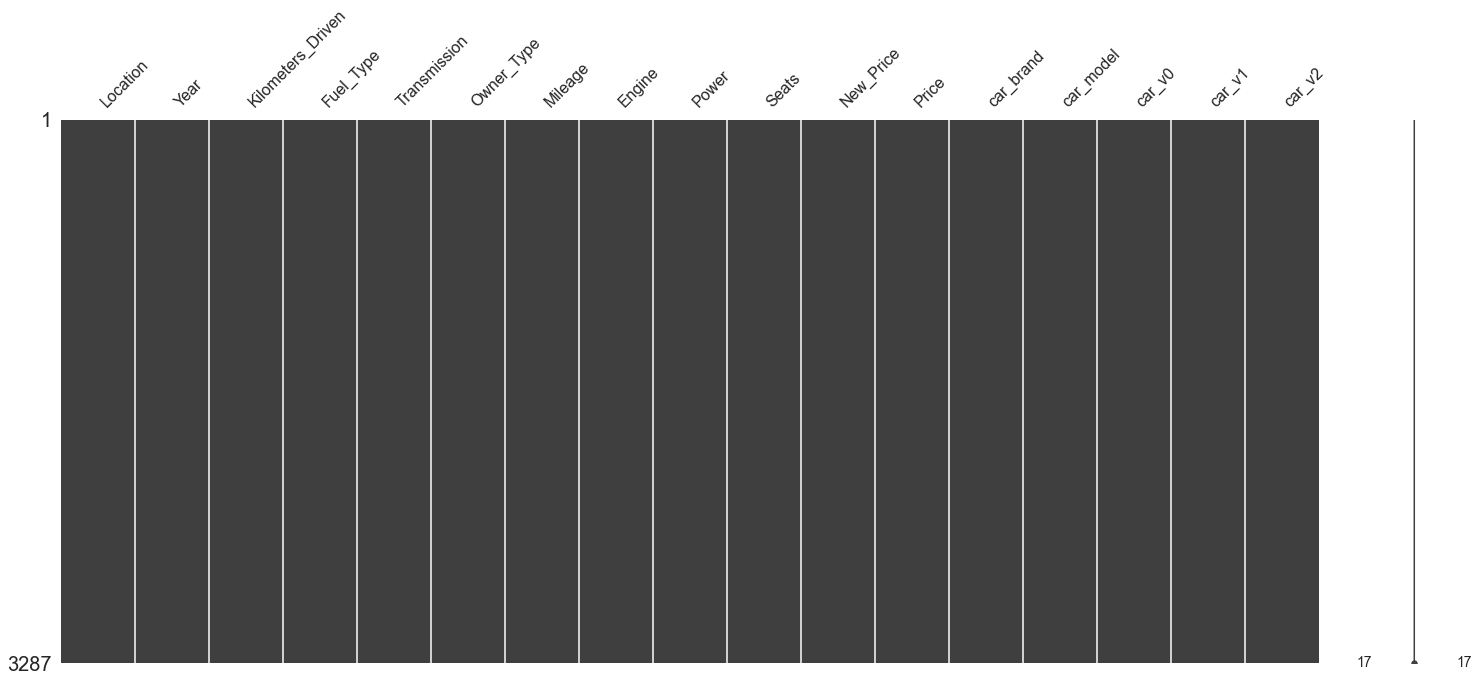

In [536]:
import missingno as missnum
missnum.matrix(cars4us)


In [537]:
cars4us.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        15.2 kmpl
3       21.1 km/kg
4       11.36 kmpl
           ...    
3282     19.3 kmpl
3283     18.5 kmpl
3284      0.0 kmpl
3285     12.8 kmpl
3286     24.4 kmpl
Name: Mileage, Length: 3287, dtype: object

In [538]:
cars4us.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_brand,car_model,car_v0,car_v1,car_v2
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti,Wagon,R,LXI,CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai,Creta,1.6,CRDi,SX
2,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi,A4,New,2.0,TDI
3,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35,Hyundai,EON,LPG,Era,Plus
4,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50,Toyota,Innova,Crysta,2.8,GX
5,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95,Tata,Indica,Vista,Quadrajet,LS
6,Kolkata,2012,60000,Petrol,Automatic,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,13.58,4.49,Honda,City,1.5,V,AT
7,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,120.00,27.00,Land,Rover,Range,Rover,2.2L
8,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,120.00,17.50,Land,Rover,Freelander,2,TD4
9,Kochi,2014,77469,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,15.05,6.34,Renault,Duster,85PS,Diesel,RxL


1 kilogram of natural gas = 1.462 litres of diesel 


In [539]:

#cars4us = cars4us.dropna(subset=["Mileage"], inplace=True)

In [540]:
Cmileage=[]
for i in cars4us.Mileage:
    if str(i).endswith('km/kg'):
        i=i[:-6]
        i=float(i)*1.40
        Cmileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i=i[:-6]
        Cmileage.append(float(i))
        
cars4us['Mileage'] = Cmileage   

In [541]:
def Engine_to_num(engine):
    if isinstance(engine,str):
        return float(engine.replace('CC',''))
    else:
        return np.nan                     

In [542]:
def Power_to_num(power):
    if isinstance(power,str):
        return float(power.replace('bhp',''))
    else:
        return np.nan 

In [543]:
cars4us['Engine']=cars4us['Engine'].apply(Engine_to_num)

In [544]:
cars4us['Power']=cars4us['Power'].apply(Power_to_num)

### We will drop the missing values in `Price` column as it is the target variable.

In [545]:
cars4us.dropna(subset=["Price"], inplace=True)

In [546]:
# let us reset the dataframe index
cars4us.reset_index(inplace=True, drop=True)

In [547]:
# checking missing values in rest of the data
cars4us.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
car_brand            0
car_model            0
car_v0               0
car_v1               0
car_v2               0
dtype: int64

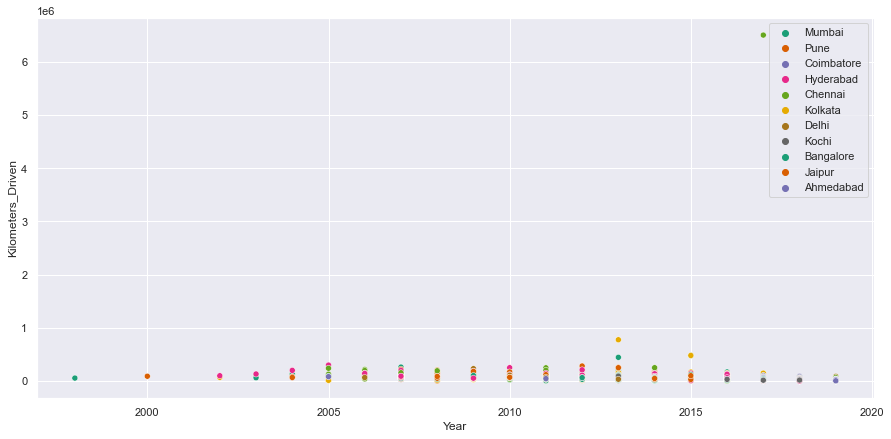

In [551]:
plt.figure(figsize=(15,7))
sns.scatterplot(cars4us["Year"],cars4us["Kilometers_Driven"],hue=cars4us["Location"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()



In [552]:
#Removing outliers
cars4us=cars4us[cars4us["Kilometers_Driven"]<600000]

No handles with labels found to put in legend.


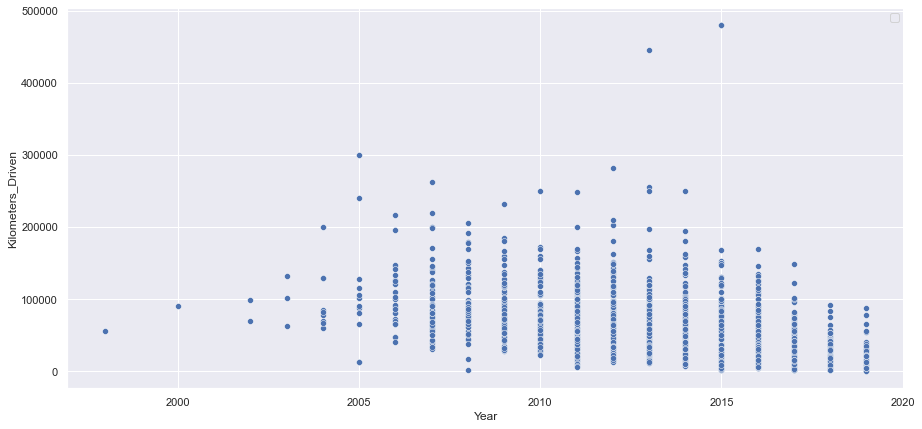

In [553]:
plt.figure(figsize=(15,7))
sns.scatterplot(cars4us["Year"],cars4u["Kilometers_Driven"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [554]:
cars4us["Kilometers_Driven"].value_counts()

60000     49
45000     43
50000     40
55000     39
65000     33
          ..
7523       1
202082     1
44383      1
81245      1
90110      1
Name: Kilometers_Driven, Length: 1772, dtype: int64

In [555]:
cars4us["Year"].value_counts()

2014    454
2016    452
2015    445
2017    387
2013    323
2012    293
2011    231
2018    192
2010    150
2009     94
2019     81
2008     72
2007     54
2006     29
2005     12
2004      9
2003      3
2002      2
2000      1
1998      1
Name: Year, dtype: int64

In [556]:
# checking for missing values in the data.
cars4us.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
car_brand            0
car_model            0
car_v0               0
car_v1               0
car_v2               0
dtype: int64

No handles with labels found to put in legend.


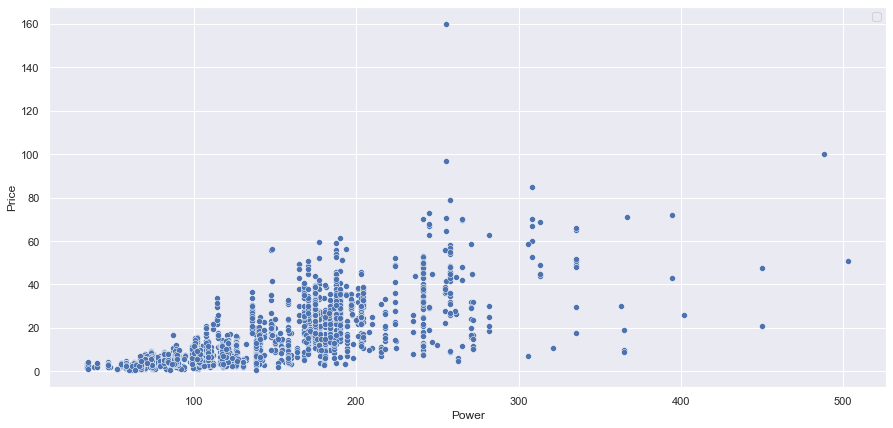

In [557]:
plt.figure(figsize=(15,7))
sns.scatterplot(cars4us["Power"],cars4us["Price"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<AxesSubplot:>

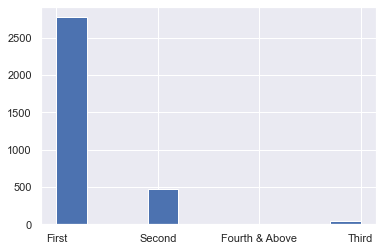

In [558]:
cars4us["Owner_Type"].hist()

<AxesSubplot:>

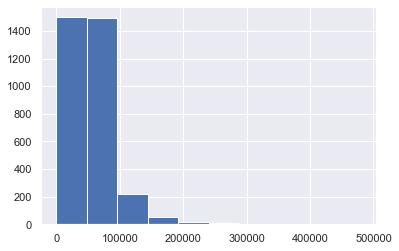

In [559]:
cars4us["Kilometers_Driven"].hist()

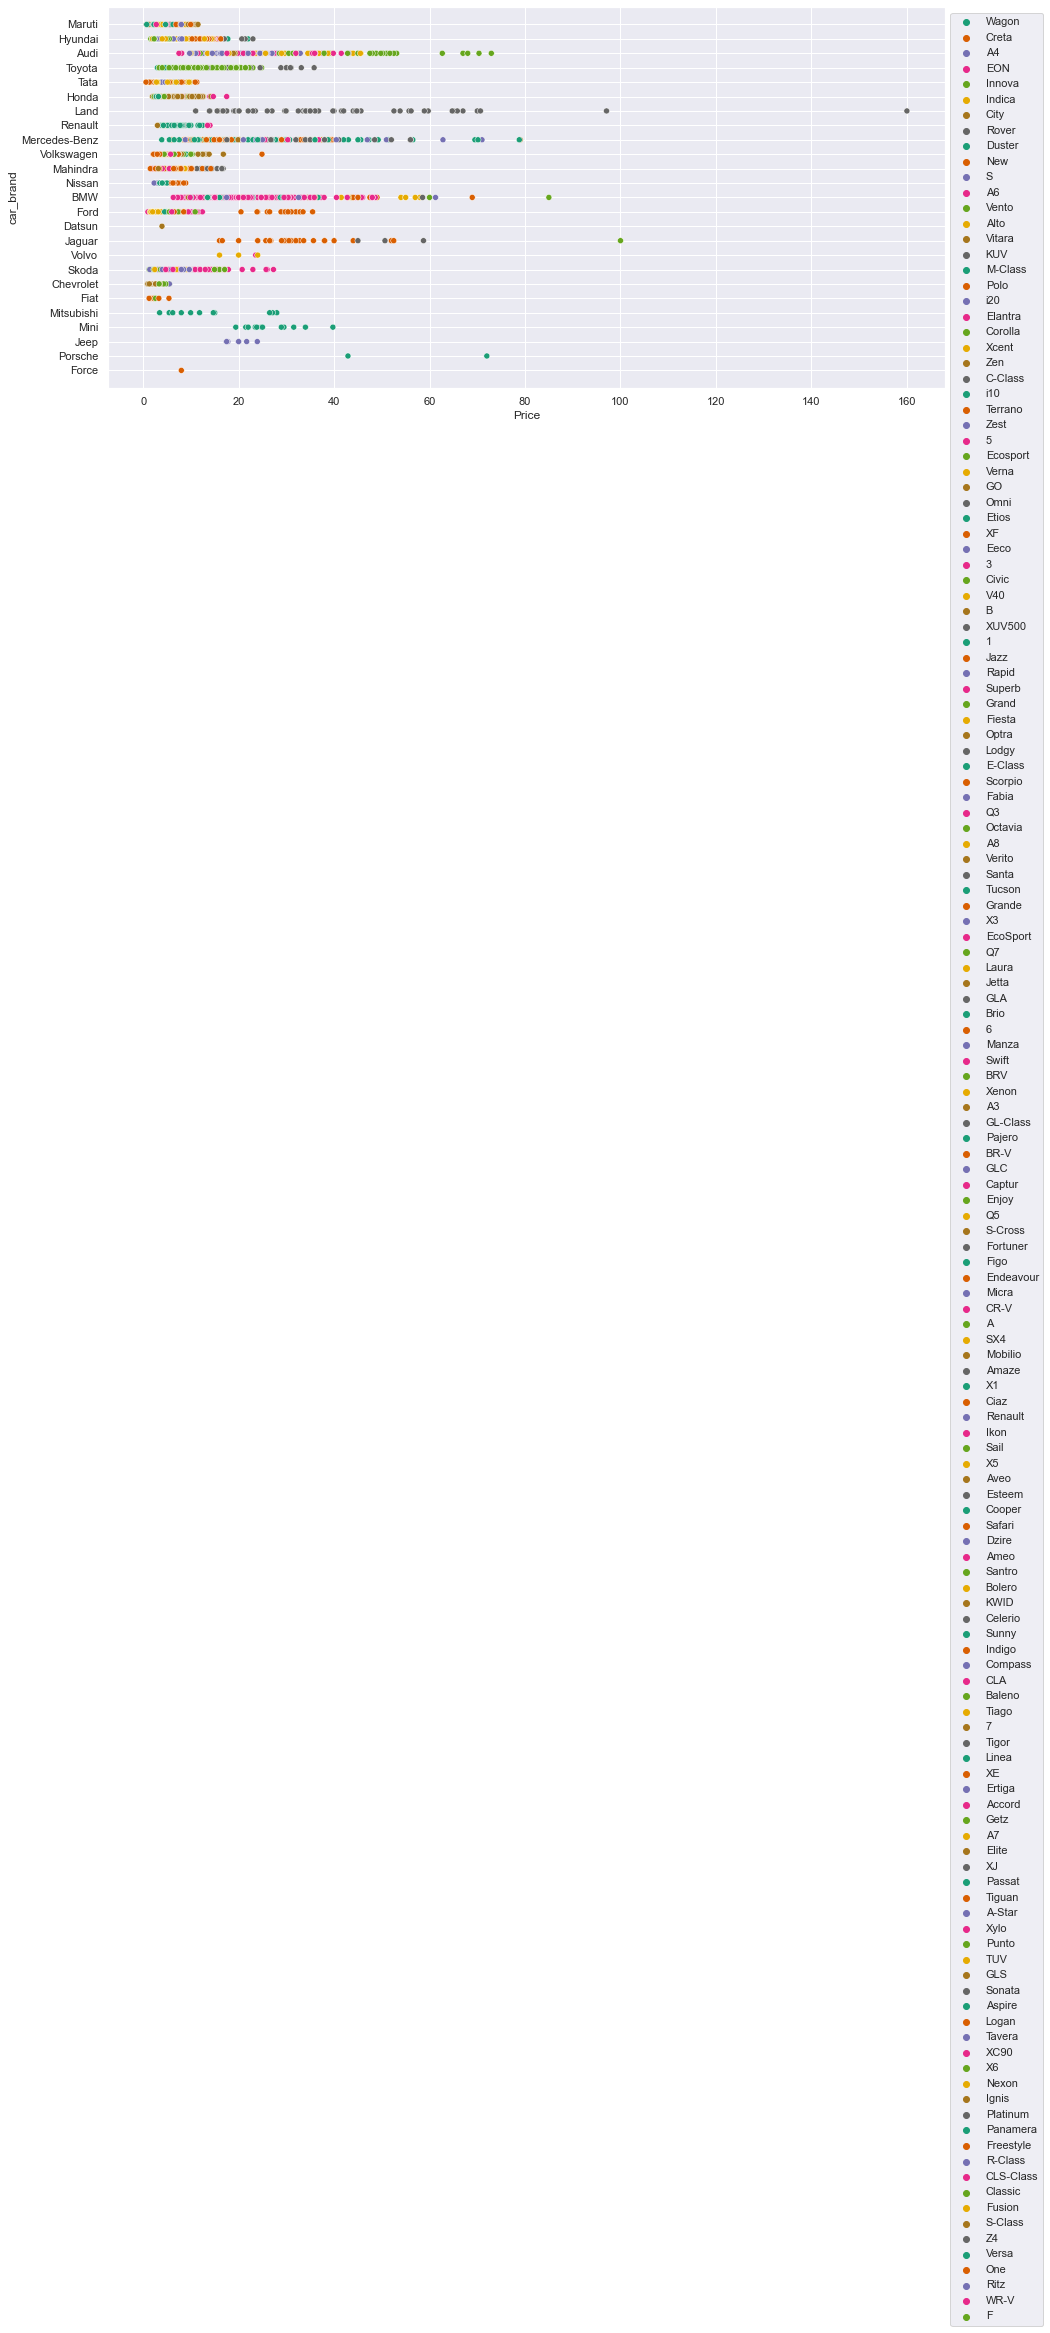

In [560]:
plt.figure(figsize=(15,7))
sns.scatterplot(cars4us["Price"],cars4us["car_brand"],hue=cars4us["car_model"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [561]:
cars4u.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_brand,car_model,car_v0,car_v1,car_v2
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,5.51,1.75,Maruti,Wagon,R,LXI,CNG
1,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,16.06,12.50,Hyundai,Creta,1.6,CRDi,SX
2,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,53.14,17.74,Audi,A4,New,2.0,TDI
3,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,5.0,10.25,2.35,Hyundai,EON,LPG,Era,Plus
4,Mumbai,2016,36000,Diesel,Automatic,First,11.30,2755.0,171.50,8.0,21.00,17.50,Toyota,Innova,Crysta,2.8,GX
5,Chennai,2012,65932,Diesel,Manual,Second,22.00,1248.0,74.00,5.0,7.63,1.95,Tata,Indica,Vista,Quadrajet,LS
6,Kolkata,2012,60000,Petrol,Automatic,First,16.00,1497.0,116.30,5.0,13.58,4.49,Honda,City,1.5,V,AT
7,Delhi,2014,72000,Diesel,Automatic,First,12.00,2179.0,187.70,5.0,120.00,27.00,Land,Rover,Range,Rover,2.2L
8,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,120.00,17.50,Land,Rover,Freelander,2,TD4
9,Kochi,2014,77469,Diesel,Manual,First,20.40,1461.0,83.80,5.0,15.05,6.34,Renault,Duster,85PS,Diesel,RxL


In [562]:
#Removing outliers
cars4us=cars4us[cars4us["Price"]<90]

In [563]:
cars4us.corr()["Price"].sort_values()

Mileage             -0.333265
Kilometers_Driven   -0.202092
Seats                0.111584
Year                 0.302017
Engine               0.665087
New_Price            0.764151
Power                0.770114
Price                1.000000
Name: Price, dtype: float64

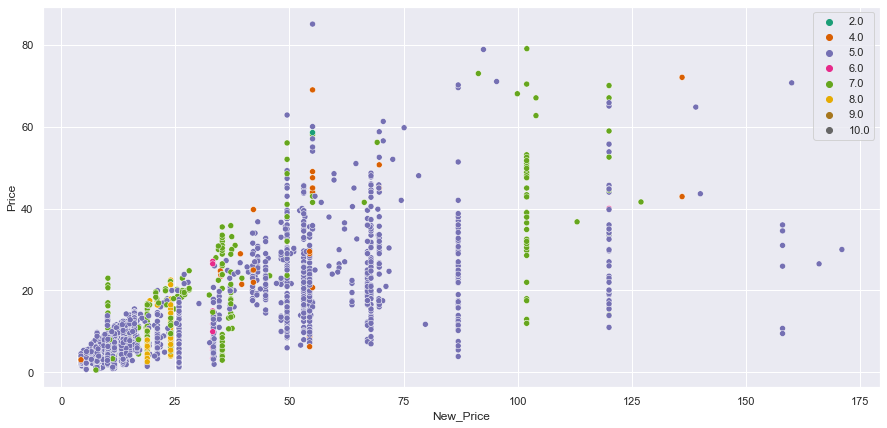

In [564]:
plt.figure(figsize=(15,7))
sns.scatterplot(cars4us["New_Price"],cars4us["Price"],hue=cars4us["Seats"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

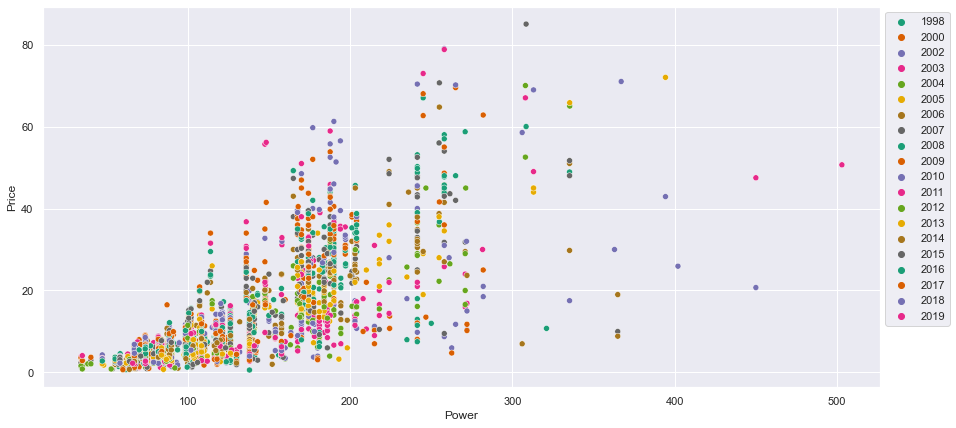

In [565]:
plt.figure(figsize=(15,7))
sns.scatterplot(cars4us["Power"],cars4us["Price"],hue=cars4us["Year"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [566]:
#Removing outliers
cars4us=cars4us[cars4us["Power"]<500]

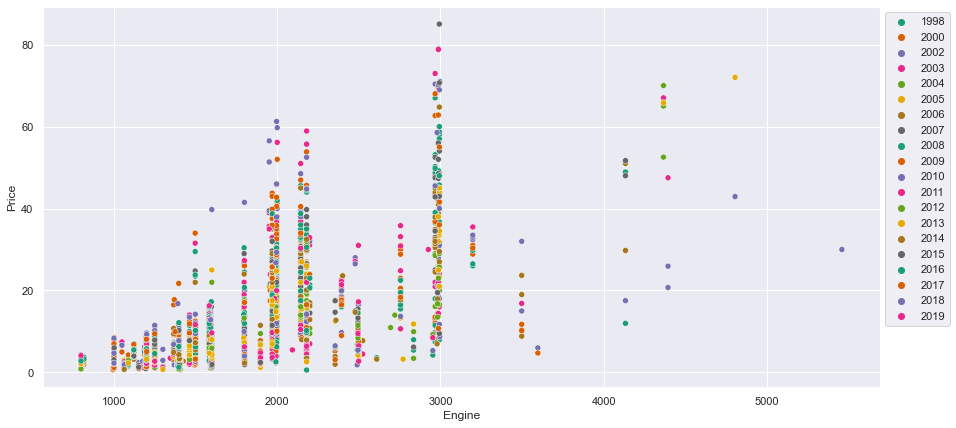

In [567]:
plt.figure(figsize=(15,7))
sns.scatterplot(cars4us["Engine"],cars4us["Price"],hue=cars4us["Year"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [568]:
#Removing outliers
cars4us=cars4us[cars4us["Engine"]<5000]

In [569]:
# filtering non-numeric columns
cat_col = cars4us.select_dtypes(exclude=np.number).columns
cat_col
# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(cars4us[column].value_counts())
    print("-" * 50)

Mumbai        477
Hyderabad     397
Coimbatore    394
Kochi         389
Pune          334
Delhi         309
Kolkata       252
Chennai       226
Bangalore     204
Jaipur        180
Ahmedabad     118
Name: Location, dtype: int64
--------------------------------------------------
Diesel    1972
Petrol    1249
CNG         50
LPG          9
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       2008
Automatic    1272
Name: Transmission, dtype: int64
--------------------------------------------------
First             2768
Second             469
Third               39
Fourth & Above       4
Name: Owner_Type, dtype: int64
--------------------------------------------------
Hyundai          587
Maruti           360
Honda            344
Mercedes-Benz    266
Toyota           241
Volkswagen       237
Ford             203
Audi             195
BMW              193
Skoda            156
Tata             108
Renault           91
Mahindra          86
Land          

* *Mumbai*  and Hyderabad are the most occuring Location.
* First and Second Owner_Type are most common
* Fuel_Type Diesel and Petrol are most common

## Let's visualize the data

### Univariate Analysis

In [571]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

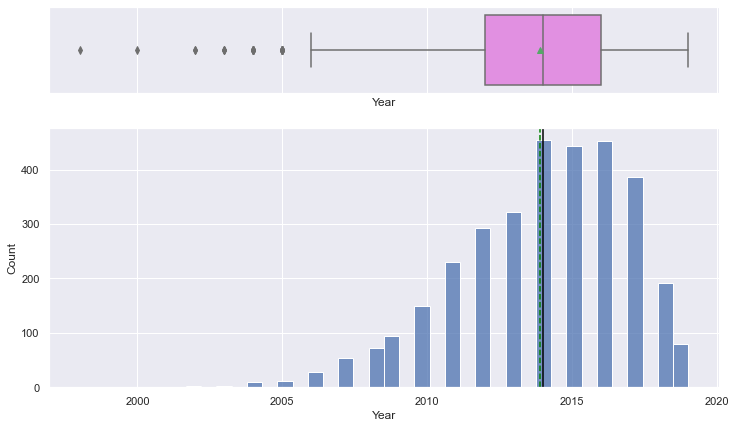

In [572]:
histogram_boxplot(cars4us, "Year")

Year is left skewed as more car purchase for the Manufacture years from 2010 to 2017

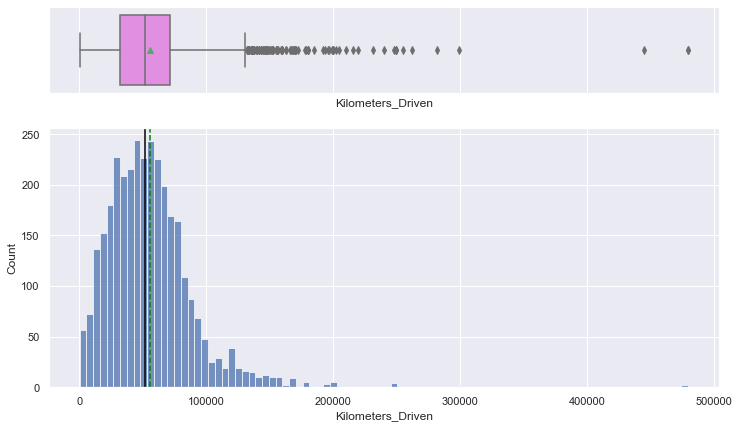

In [573]:
histogram_boxplot(cars4us, "Kilometers_Driven")

The total kilometers driven in the car by the previous owner(s) in km is right skewed, and range upto 70,000KM


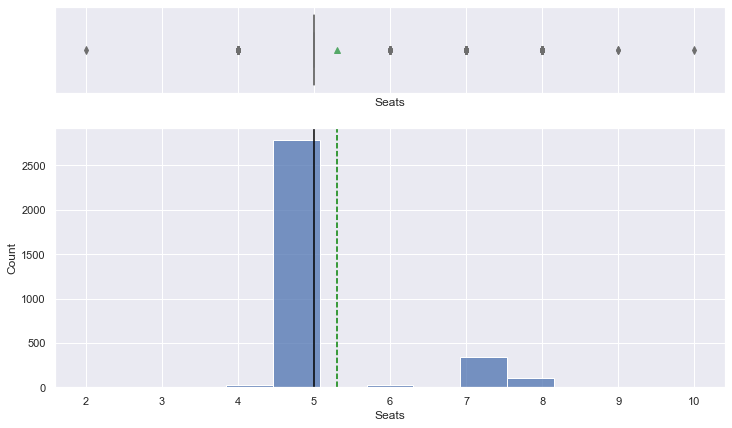

In [574]:
histogram_boxplot(cars4us, "Seats")

In [575]:
cars4us["Seats"].value_counts()

5.0     2783
7.0      341
8.0      101
4.0       30
6.0       21
9.0        2
2.0        1
10.0       1
Name: Seats, dtype: int64

Most of the cars are 5 seats

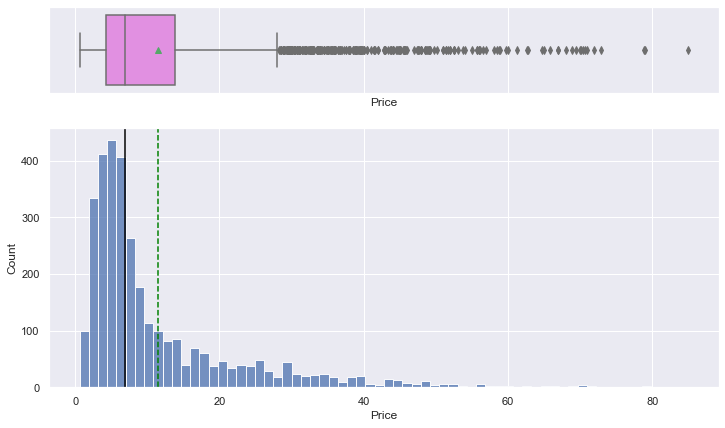

In [576]:
histogram_boxplot(cars4us, "Price")

In [577]:
cars4us["Price"].value_counts()

5.50     51
6.50     40
3.50     39
4.50     37
6.00     31
         ..
4.22      1
24.95     1
43.35     1
13.55     1
1.15      1
Name: Price, Length: 1068, dtype: int64

Price is right skewed

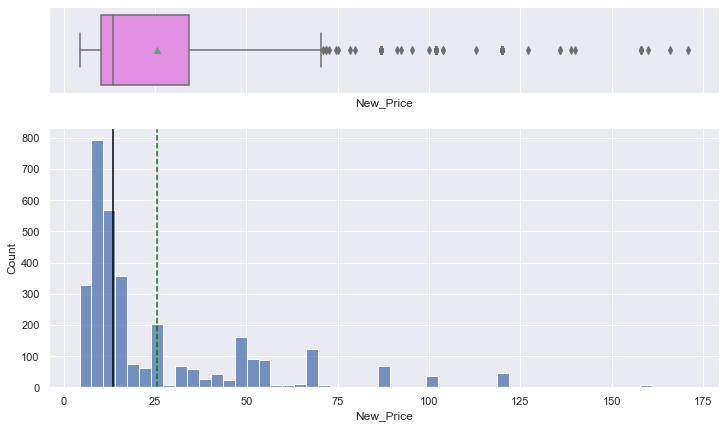

In [578]:
histogram_boxplot(cars4us, "New_Price")

In [579]:
cars4us["New_Price"].value_counts()

13.58    253
10.25    188
10.15    161
49.49    141
7.88     126
        ... 
6.42       1
32.45      1
4.43       1
17.00      1
9.97       1
Name: New_Price, Length: 389, dtype: int64

New car price also right skewed

In [580]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

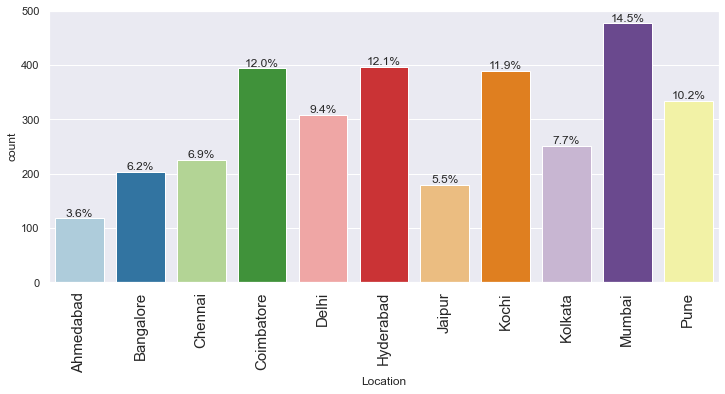

In [581]:
labeled_barplot(cars4us, "Location", perc=True)

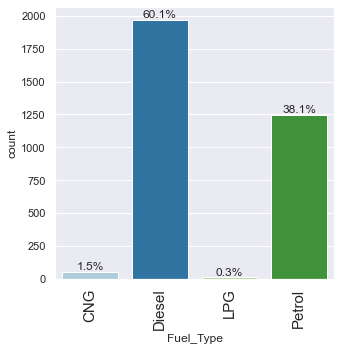

In [582]:
labeled_barplot(cars4us, "Fuel_Type", perc=True)

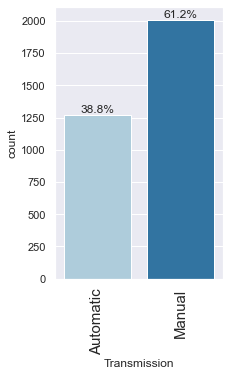

In [583]:
labeled_barplot(cars4us, "Transmission", perc=True)

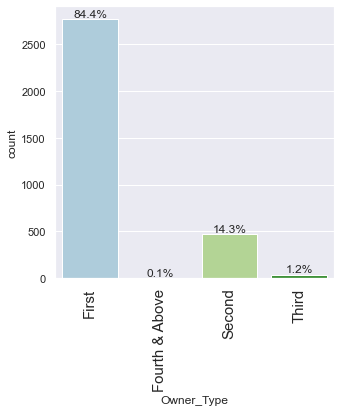

In [584]:
labeled_barplot(cars4us, "Owner_Type", perc=True)

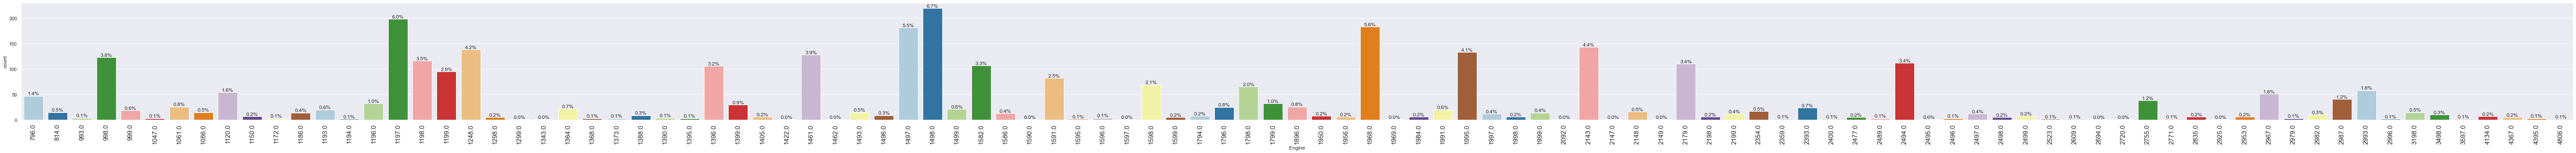

In [585]:
labeled_barplot(cars4us, "Engine", perc=True)

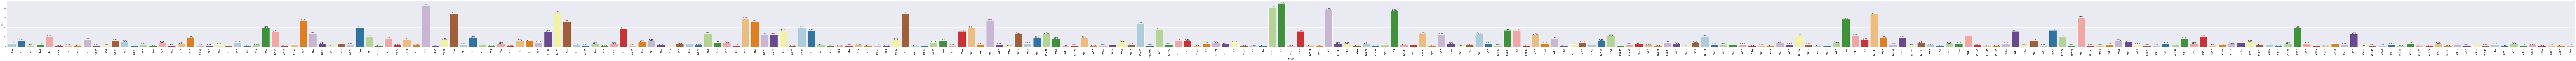

In [586]:
labeled_barplot(cars4us, "Power", perc=True)

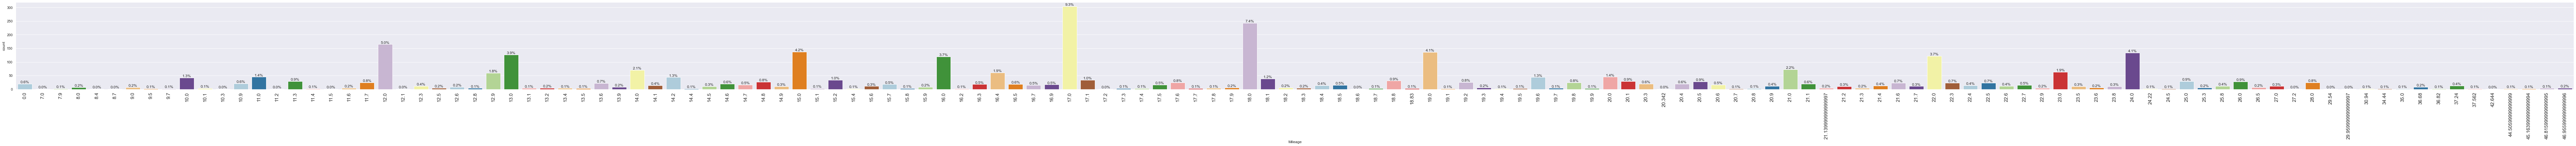

In [587]:
labeled_barplot(cars4us, "Mileage", perc=True)

### Bivariate analysis


In [588]:
corr_cols = [item for item in cars4us.columns]
print(corr_cols)

['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'car_brand', 'car_model', 'car_v0', 'car_v1', 'car_v2']


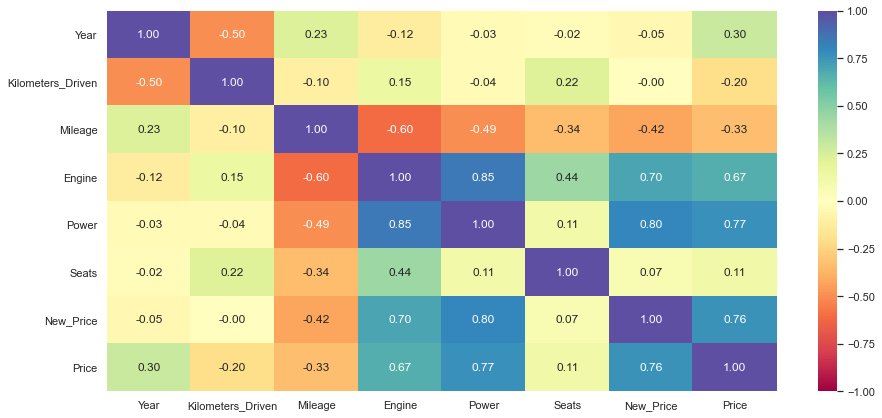

In [589]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    cars4us[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* `Price` and `New_Price` columns are highly correlated.
* `Price` and `Year` columns are correlated.



### Let's check the variation in `Price` with some of the categorical columns in our data

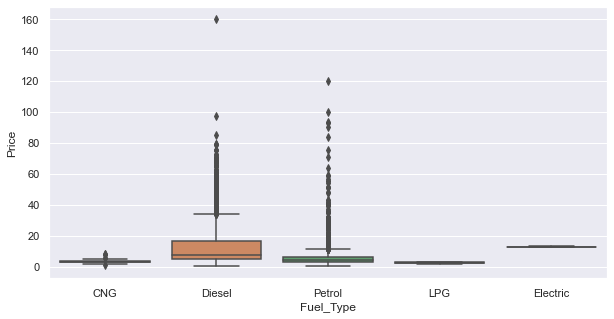

In [590]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=data)
plt.show()

Diesel vehicle are more Priced

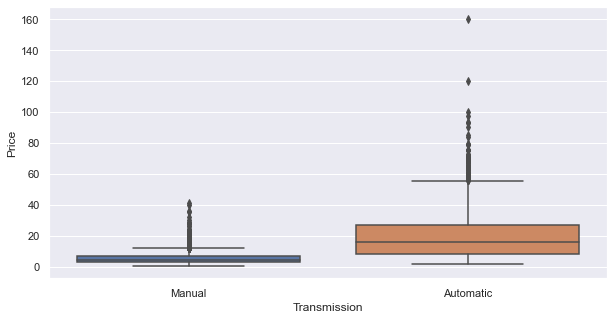

In [591]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=data)
plt.show()

Automatic cars are high priced

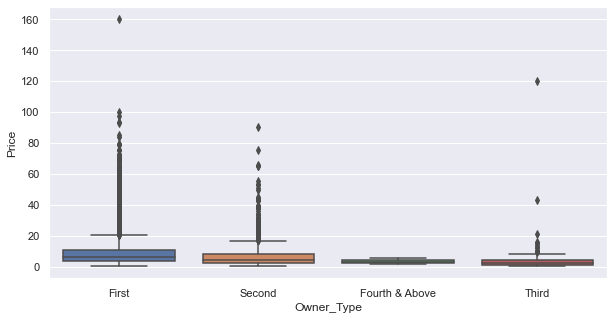

In [592]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=data)
plt.show()

First cars are the highest priced .Then Second owner typed cars. Fourth and above cars are the least priced.

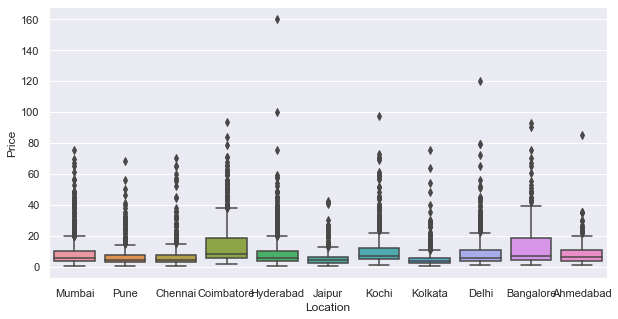

In [593]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=data)
plt.show()

Coimbatore and Bangalore cars are high priced in general.

## Model Building

### Define dependent variable

In [594]:
cars4us = cars4us.reset_index()
X = cars4us.drop(["index"], axis=1)
X = cars4us.drop(["Price"], axis=1)
y = cars4us["Price"]

In [595]:
y.head()

0     1.75
1    12.50
2    17.74
3     2.35
4    17.50
Name: Price, dtype: float64

### Creating dummy variables


In [596]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,index,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,car_brand_BMW,car_brand_Chevrolet,car_brand_Datsun,car_brand_Fiat,car_brand_Force,car_brand_Ford,car_brand_Honda,car_brand_Hyundai,car_brand_Jaguar,car_brand_Jeep,car_brand_Land,car_brand_Mahindra,car_brand_Maruti,car_brand_Mercedes-Benz,car_brand_Mini,car_brand_Mitsubishi,car_brand_Nissan,car_brand_Porsche,car_brand_Renault,car_brand_Skoda,car_brand_Tata,car_brand_Toyota,car_brand_Volkswagen,car_brand_Volvo,car_model_3,car_model_5,car_model_6,car_model_7,car_model_A,car_model_A-Star,car_model_A3,car_model_A4,car_model_A6,car_model_A7,car_model_A8,car_model_Accord,car_model_Alto,car_model_Amaze,car_model_Ameo,car_model_Aspire,car_model_Aveo,car_model_B,car_model_BR-V,car_model_BRV,car_model_Baleno,car_model_Bolero,car_model_Brio,car_model_C-Class,car_model_CLA,car_model_CLS-Class,car_model_CR-V,car_model_Captur,car_model_Celerio,car_model_Ciaz,car_model_City,car_model_Civic,car_model_Classic,car_model_Compass,car_model_Cooper,car_model_Corolla,car_model_Creta,car_model_Duster,car_model_Dzire,car_model_E-Class,car_model_EON,car_model_EcoSport,car_model_Ecosport,car_model_Eeco,car_model_Elantra,car_model_Elite,car_model_Endeavour,car_model_Enjoy,car_model_Ertiga,car_model_Esteem,car_model_Etios,car_model_Fabia,car_model_Fiesta,car_model_Figo,car_model_Fortuner,car_model_Freestyle,car_model_Fusion,car_model_GL-Class,car_model_GLA,car_model_GLC,car_model_GLS,car_model_GO,car_model_Getz,car_model_Grand,car_model_Grande,car_model_Ignis,car_model_Ikon,car_model_Indica,car_model_Indigo,car_model_Innova,car_model_Jazz,car_model_Jetta,car_model_KUV,car_model_KWID,car_model_Laura,car_model_Linea,car_model_Lodgy,car_model_Logan,car_model_M-Class,car_model_Manza,car_model_Micra,car_model_Mobilio,car_model_New,car_model_Nexon,car_model_Octavia,car_model_Omni,car_model_One,car_model_Optra,car_model_Pajero,car_model_Panamera,car_model_Passat,car_model_Platinum,car_model_Polo,car_model_Punto,car_model_Q3,car_model_Q5,car_model_Q7,car_model_R-Class,car_model_Rapid,car_model_Renault,car_model_Ritz,car_model_Rover,car_model_S,car_model_S-Class,car_model_S-Cross,car_model_SX4,car_model_Safari,car_model_Sail,car_model_Santa,car_model_Santro,car_model_Scorpio,car_model_Sonata,car_model_Sunny,car_model_Superb,car_model_Swift,car_model_TUV,car_model_Tavera,car_model_Terrano,car_model_Tiago,car_model_Tigor,car_model_Tiguan,car_model_Tucson,car_model_V40,car_model_Vento,car_model_Verito,car_model_Verna,car_model_Versa,car_model_Vitara,car_model_WR-V,car_model_Wagon,car_model_X1,car_model_X3,car_model_X5,car_model_X6,car_model_XC90,car_model_XE,car_model_XF,car_model_XJ,car_model_XUV500,car_model_Xcent,car_model_Xenon,car_model_Xylo,car_model_Z4,car_model_Zen,car_model_Zest,car_model_i10,car_model_i20,car_v0_1.05,car_v0_1.1,car_v0_1.2,car_v0_1.2L,car_v0_1.2P,car_v0_1.3,car_v0_1.4,car_v0_1.5,car_v0_1.5D,car_v0_1.6,car_v0_1.8,car_v0_1.9,car_v0_1.99,car_v0_100,car_v0_110PS,car_v0_2.0,car_v0_2.0L,car_v0_2.2,car_v0_2.4,car_v0_2.4L,car_v0_2.5,car_v0_2.5L,car_v0_2.6,car_v0_2.8,car_v0_200,car_v0_2001-2003,car_v0_2006-2010,car_v0_2007,car_v0_2007-2011,car_v0_2007-2015,car_v0_2008-2012,car_v0_2009-2013,car_v0_2009-2014,car_v0_2010,car_v0_2010-2013,car_v0_2011-2014,car_v0_2011-2015,car_v0_2012-2014,car_v0_2012-2015,car_v0_2013-2015,car_v0_2013-2016,car_v0_2014-2019,car_v0_2015-2017,car_v0_2015-2019,car_v0_220d,car_v0_230,car_v0_250,car_v0_3,car_v0_3.0,car_v0_3.0L,car_v0_3.2,car_v0_3.6,car_v0_30,car_v0_300,car_v0_35,car_v0_350,car_v0_350d,car_v0_4.2,car_v0_43,car_v0_45,car_v0_4x2,car_v0_4x4,car_v0_5,car_v0_7,car_v0_8,car_v0_800,car_v0_85PS,car_v0_AMT,car_v0_AT,car_v0_Active,car_v0_Aero,car_v0_Alpha,car_v0_Alt

### Split the data into train and test

In [597]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [598]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2296
Number of rows in test data = 984


In [599]:
import pandas as pd
import numpy as np

def clean_dataset(cars4us):
    assert isinstance(cars4us, pd.DataFrame), "df needs to be a pd.DataFrame"
    cars4us.dropna(inplace=True)
    indices_to_keep = ~cars4us.isin([np.nan, np.inf, -np.inf]).any(1)
    return cars4us[indices_to_keep].astype(np.float64)


### Fitting a linear model

In [600]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [601]:
x_train.fillna(x_train.mean(), inplace=True)

In [602]:
from joblib import dump, load

dump(lin_reg_model, "lin_reg_model.joblib")

['lin_reg_model.joblib']

In [603]:
lin_reg_model

LinearRegression()

In [604]:
lin_reg_model_reloaded = load("lin_reg_model.joblib")

In [605]:
lin_reg_model.predict(x_test.iloc[[0]])

array([-0.11129388])

In [606]:
np.dot(lin_reg_model.coef_, x_test.iloc[0]) + lin_reg_model.intercept_

-0.1112938763276361

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [607]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
index,0.000058
Year,1.343142
Kilometers_Driven,-0.000019
Mileage,0.067378
Engine,-0.005671
...,...
car_v2_quattro,-10.752595
car_v2_sDrive,-5.614282
car_v2_with,-7.534351
car_v2_xLine,-13.084351


### Coefficient Interpretations


** Coefficients of columns which are positive- Year ,Mileage
    -  when Cars with latest years have high price.
    -  When good mileage cars price also high.
    
 ** Coefficients of columns which  are negative.Engine ,Kilometers_Driven
    - Increase in these will lead to a decrease in car price.

### Model performance check

We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [608]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [609]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.668616,1.551517,0.948378,0.9097,21.767633


In [610]:
x_test.fillna(x_test.median(), inplace=True)

In [611]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.633237,2.703008,0.83042,-inf,41.741244


** Observations **

- The train and test $R^2$ are 0.94 and 0.77, indicating that the model explains 94% and 83% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are not matching.

- This shows that the model is overfitting.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 2.70 on the test set.

- MAPE of 41.74 on the test data means that we are able to predict within ~42% of the used car price.


## Conclusions

- We have been able to build a predictive model that can be used  to predict the Used Car price with an $R^2$ of 0.94 on the training set.

-  can use this model to predict the used car price within a mean error of 2.70 on the test set.


- We found that kilometers driven in the car by the previous owner(s) in km and Engine are some of the factors which tend to decrease the used car price.


- We found that newer cars or year is high then the car price also will be high . We also found that the cars with good mileage  also have high price.

